# Game rating depending on users' review

### In this analysis I used dataset called `train.csv`, which contains such a information like `review_id`, `title`, `year`, `user_review` and `user suggestion`. All data is about video games gathered on Steam platform, where users could give some feedback about these game in form of comment __and__ rating - positive and negative. Training model created in this analysis is to determine rating (positive or negative) depending __only__ on users' comment.

## Used classifier methods:
- __Logistic Regression__
- __Decision Tree__
- __Random Forest__
- __Ensemble method - Voting__ 

# 1. Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics

def remove_punctuation(text):
    # if function reveice np.nan, return nothing
    if not isinstance(text, str):
        return ''

    to_remove = "!\"$%&'()*+,-.:;<=>\?@^_`{|}~"
    translator = str.maketrans('', '', to_remove)
    return text.translate(translator)

review_df = pd.read_csv('train.csv')
review_df['user_review'] = review_df['user_review'].apply(remove_punctuation)
review_df.head()

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,Im scared and hearing creepy voices So Ill pa...,1
1,2,Spooky's Jump Scare Mansion,2016.0,Best game more better than Sam Peppers YouTube...,1
2,3,Spooky's Jump Scare Mansion,2016.0,A littly iffy on the controls but once you kno...,1
3,4,Spooky's Jump Scare Mansion,2015.0,Great game fun and colorful and all thatA side...,1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1


That is how our data looks like after removing interpunction signs in `user_review`. `user_suggestion` is boolean type: 0 represents negative rating, 1 - positive.

In [2]:
train, test = train_test_split(review_df[['user_review', 'user_suggestion']], train_size=0.8)

Spliting dataset into `train & test` datasets.

In [3]:
vectorizer = CountVectorizer()

train_T = vectorizer.fit_transform(train.user_review)
test_T = vectorizer.transform(test.user_review)

Transform `user_review` dataframe series into vectors.

In [4]:
model = LogisticRegression()
model.fit(train_T, train.user_suggestion)

C:\Users\lukasz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Train our model depending on previously transformed __train__ data (vector: contains text converted into numerical values) and expected output (boolean: `user_suggestion`).

In [5]:
indices = np.argsort(model.coef_)
words = np.array(vectorizer.get_feature_names_out())

print('Top 10 positive words: ', words[indices[0, -10:]])
print('Top 10 negative words: ', words[indices[0, :10]])

Top 10 positive words:  ['rough' 'amazing' 'planetside' 'fantastic' 'hats' 'complaining' '11'
 'school' 'addictive' 'highly']
Top 10 negative words:  ['unplayable' 'uninstall' 'gaijin' 'worst' 'garbage' 'sad' 'ruined'
 'worse' 'delete' 'terrible']


Sorts indices by model coefficiets and prints first 10 positive and negative words in users' reviews.

In [7]:
pred = model.predict(test_T)

Predict users' rating depending on transformed __test__ dataset.

In [8]:
prob = model.predict_proba(test_T)
print(prob[:10])

[[3.00674247e-03 9.96993258e-01]
 [2.77523450e-01 7.22476550e-01]
 [3.92658361e-01 6.07341639e-01]
 [8.45741179e-01 1.54258821e-01]
 [4.36374330e-04 9.99563626e-01]
 [9.04755964e-01 9.52440359e-02]
 [3.27065677e-04 9.99672934e-01]
 [4.83488967e-01 5.16511033e-01]
 [1.42056164e-04 9.99857944e-01]
 [6.33398263e-08 9.99999937e-01]]


Get array of probability: first column represents probability of predicting negative rating and second - of positive rating.

In [9]:
positive = np.argsort(prob[:,1])[-5:]
print('5 most positive reviews:\n', test['user_review'].iloc[positive])

negative = np.argsort(prob[:,0])[-5:]
print('5 most negative reviews:\n', test['user_review'].iloc[negative])

5 most positive reviews:
 5169    Early Access ReviewThis game is like a love le...
3706    Team Fortress 2 TF2 is one the games that you ...
6533    Very Very Very Very Very Very Very Very Very V...
3616    Ive split up this review into different fracti...
933     Early Access ReviewI picked up Fractured Space...
Name: user_review, dtype: object
5 most negative reviews:
 14131    game session active game session active game s...
4434     ABSOLUTE P2W GAME DONT WASTE YOUR MONEY ONLINE...
6633     Ive put many months into this game both here o...
14478    Early Access ReviewDo NOT get this game WOWIt ...
14689    Early Access ReviewThe gameplay isnt very good...
Name: user_review, dtype: object


Print 5 most positive and negative reviews.

In [10]:
model.score(test_T, test.user_suggestion)

0.8356673335238639

Our model accuracy.

Below we have all of presious operations, but with limited dictionary. 

In [11]:
significant_words = ['believe', 'complaint', 'alpha', 'smash', 'fantastic', 'hats', 'planetside',
 'highly', 'ccg', 'addictive']

In [12]:
def local() -> list:
    train, test = train_test_split(review_df[['user_review', 'user_suggestion']], train_size=0.8)
    vectorizer = CountVectorizer()
    vectorizer.fit(significant_words)

    train_T = vectorizer.transform(train.user_review)
    test_T = vectorizer.transform(test.user_review)

    model = LogisticRegression()
    model.fit(train_T, train.user_suggestion)

    indices = np.argsort(model.coef_)
    words = np.array(vectorizer.get_feature_names_out())
    print('Top 10 positive words: ', words[indices[0, -10:]])
    print('Top 10 negative words: ', words[indices[0, :10]])

    pred = model.predict(test_T)
    prob = model.predict_proba(test_T)

    positive = np.argsort(prob[:,1])[-5:]
    print('Negative reviews:\n', test['user_review'].iloc[positive])
    negative = np.argsort(prob[:,0])[-5:]
    print('Positive reviews:\n', test['user_review'].iloc[negative])

    return vectorizer, model, test_T, test.user_suggestion

vectorizer_lim, model_lim, test_T_lim, test_y = local()

Top 10 positive words:  ['believe' 'planetside' 'alpha' 'fantastic' 'ccg' 'hats' 'complaint'
 'addictive' 'highly' 'smash']
Top 10 negative words:  ['believe' 'planetside' 'alpha' 'fantastic' 'ccg' 'hats' 'complaint'
 'addictive' 'highly' 'smash']
Negative reviews:
 5071    Early Access ReviewPeople compare this game to...
5231    Early Access ReviewWell as it looks kinda crap...
7000    There seem to be plenty of reviews from the pe...
9090    Planetside 2 might seem like an amazing game a...
5334    Early Access ReviewProbably the best alternati...
Name: user_review, dtype: object
Positive reviews:
 17017    Early Access ReviewThey still have a long long...
17176    This game doesnt work well I tried to run it o...
7261     Been playing this game for a while New update ...
16388    PLUSES This game is totally free A lot of guns...
12023    Played the game through the tutorial and it wa...
Name: user_review, dtype: object


In [13]:
coef_tuple = zip(vectorizer_lim.get_feature_names_out(), model_lim.coef_[0])
for word, coef in coef_tuple:
    print(f"{word}: {coef}")

addictive: 1.3862745636890543
alpha: 0.7132906188862832
believe: 0.12899329027124323
ccg: 0.8328849255218634
complaint: 1.1535332339542086
fantastic: 0.809119330663941
hats: 0.9028189365332925
highly: 1.4369726449469544
planetside: 0.6994611717210006
smash: 1.6349443387024976


Impact of significant words.

In [14]:
import sys, time

In [15]:
%%time
%%timeit
model_lim.predict(test_T_lim)

95.1 µs ± 2.99 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
CPU times: total: 7.19 s
Wall time: 7.79 s


In [16]:
print('Accuracy of prediction: ', model_lim.score(test_T_lim, test_y))

Accuracy of prediction:  0.5618748213775364


In [17]:
%%time
%%timeit
model.predict(test_T)

1.61 ms ± 20.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
CPU times: total: 12.6 s
Wall time: 13 s


In [18]:
print('Accuracy of prediction: ', model.score(test_T, test.user_suggestion))

Accuracy of prediction:  0.8356673335238639


As we can see, accuracy of prediction is a much better in case we don't limit the dictionary to significant words, but prediction execution time is 2 times faster with limited words.

# Decision Tree
### Decision Tree is the one of most powerful and popular tool for classification and prediction. A Decision tree is a flowchart-like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label. 

In [19]:
train_tree = train.copy()
test_tree = test.copy()

train_tree_T = train_T.copy()
test_tree_T = test_T.copy()

DTC = DecisionTreeClassifier(criterion="entropy", max_depth=3)
DTC.fit(train_tree_T, train_tree.user_suggestion)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

Train our decision tree with date from train datasets. Set `max_depth` on 3, because unlimited depth could result in big time of tree training.

DTC Accuracy: 0.6307516433266648


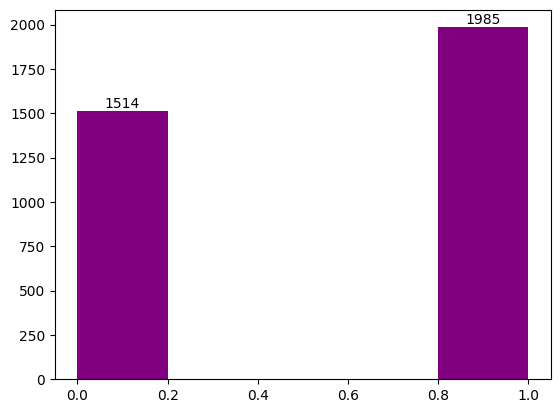

In [35]:
pred_test = DTC.predict(test_tree_T)

tmp = np.array(test_tree.user_suggestion.value_counts())

plt.text(0.1, tmp[1] + 20, tmp[1], ha='center')
plt.text(0.9, tmp[0] + 20, tmp[0], ha='center')
plt.hist(test_tree.user_suggestion, 5, color='purple')

print("DTC Accuracy:",DTC.score(test_tree_T, test_tree.user_suggestion))

First bar represents number of negative ratings in test dataset and second - positive ratings.

(array([1046.,    0.,    0.,    0., 2453.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <BarContainer object of 5 artists>)

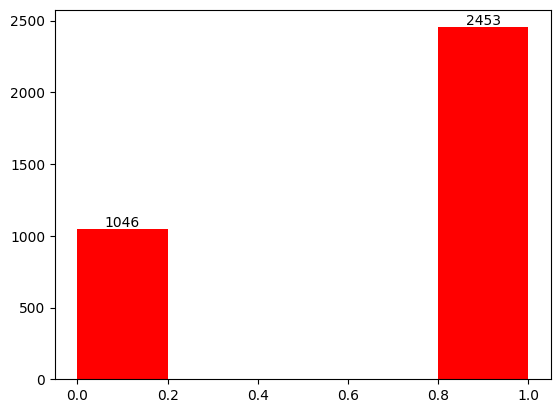

In [34]:
zeros = np.count_nonzero(pred_test == 0)
ones = np.count_nonzero(pred_test == 1)
plt.text(0.1, zeros + 20, zeros, ha='center')
plt.text(0.9, ones + 20, ones, ha='center')
plt.hist(pred_test, 5, color='red')

And there we have predicted ratings. As we can see there is some divergence between tree predicted values and true values.

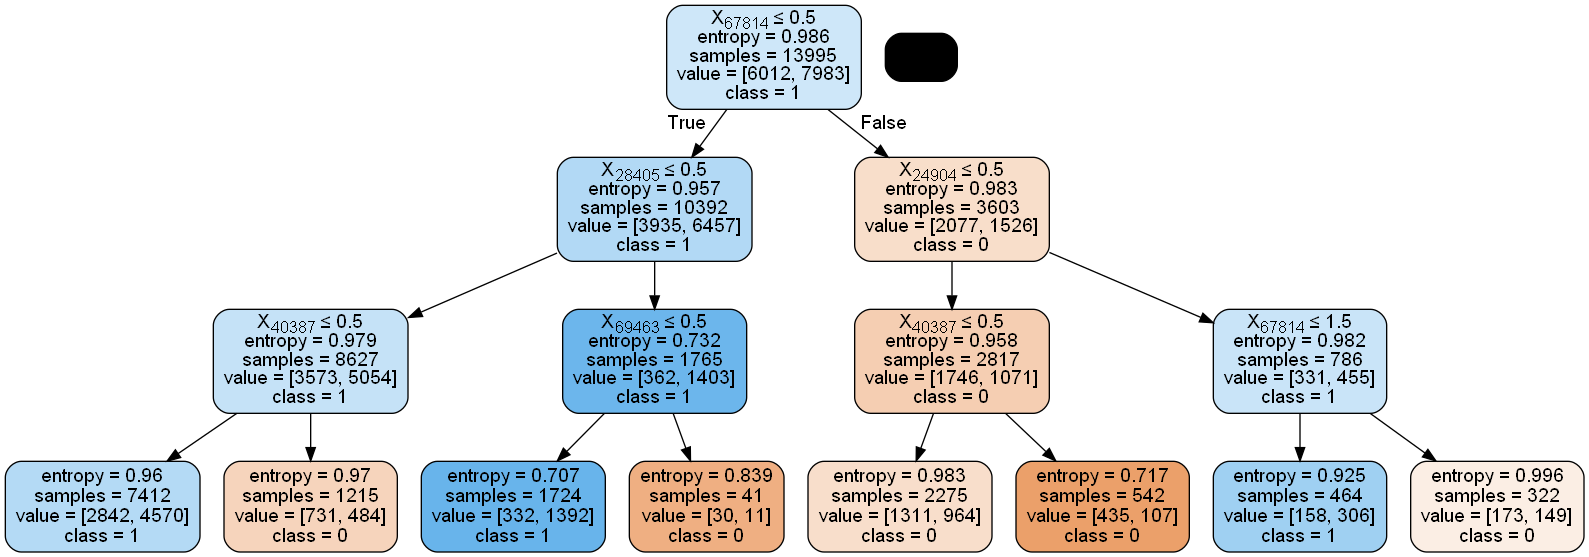

In [41]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(DTC, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('reviews.png')
Image(graph.create_png())

Decision tree visualisation.

# Random Forest Classifier
### Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset. Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.

In [45]:
RFC = RandomForestClassifier(max_depth=5, n_estimators=10)

train_forest = train.copy()
test_forest = test.copy()

train_forest_T = train_T.copy()
test_forest_T = test_T.copy()

RFC.fit(train_forest_T, train_forest.user_suggestion)

estimator_limited = RFC.estimators_[5]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0,
            random_state=1538259045, splitter='best')



DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1538259045)

In [46]:
print('RFC Accuracy: ', RFC.score(test_forest_T, test_forest.user_suggestion))

RFC Accuracy:  0.584452700771649


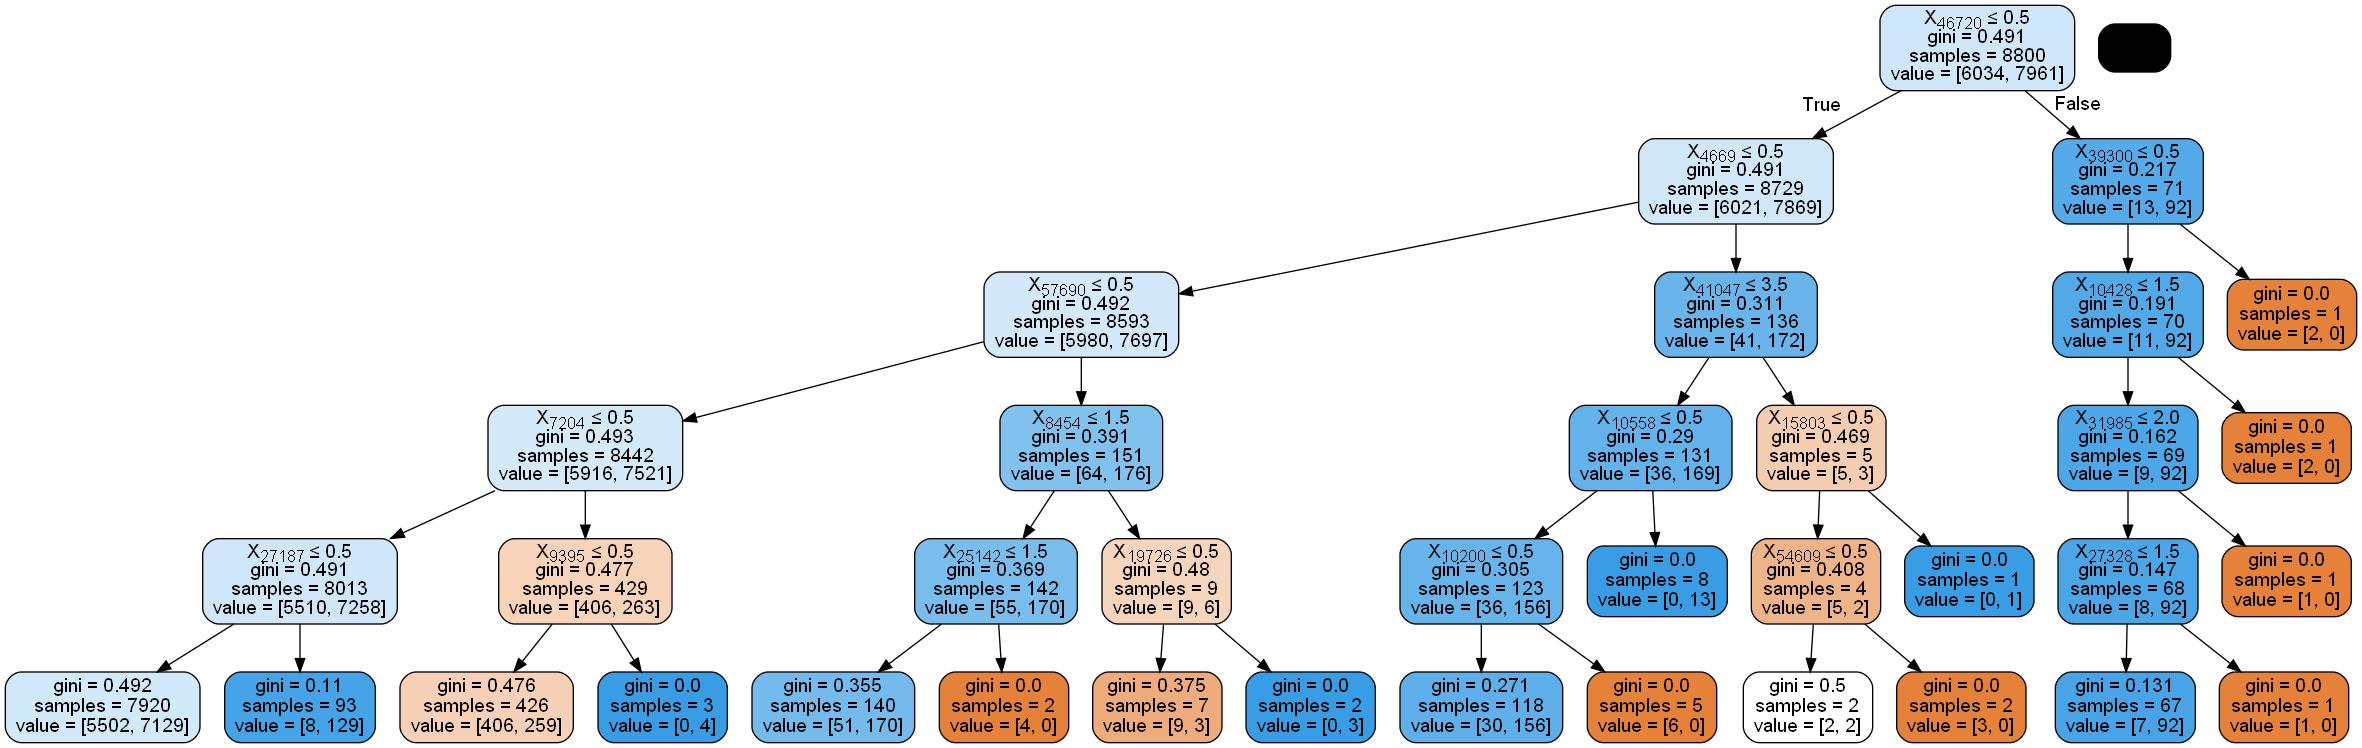

In [47]:
dot_data = StringIO()
export_graphviz(estimator_limited, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Random forest visualisation.

# Ensemble method - Voting
### Ensemble methods are techniques that create multiple models and then combine them to produce improved results. Ensemble methods usually produces more accurate solutions than a single model would. In below example I've created logistic regression and randomforest models and then combine them by `VotingClassifier` into one model.

In [48]:
model_1 = LogisticRegression()
model_2 = RandomForestClassifier()

final_model = VotingClassifier(estimators=[('lr', model_1), ('rfc', model_2)], voting='hard')

train_ensemble = train.copy()
test_ensemble = test.copy()

train_ensemble_T = train_T.copy()
test_ensemble_T = test_T.copy()

final_model.fit(train_ensemble_T, train_ensemble.user_suggestion)

C:\Users\lukasz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rfc', RandomForestClassifier())])

There I did not limited any data or forest depth, so time of training is pretty long.

In [49]:
pred_final = final_model.predict(test_ensemble_T)
print('Ensemble accuracy: ', final_model.score(test_ensemble_T, test_ensemble.user_suggestion))

Ensemble accuracy:  0.8333809659902829


Our final model accuracy.

(array([1514.,    0.,    0.,    0., 1985.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <BarContainer object of 5 artists>)

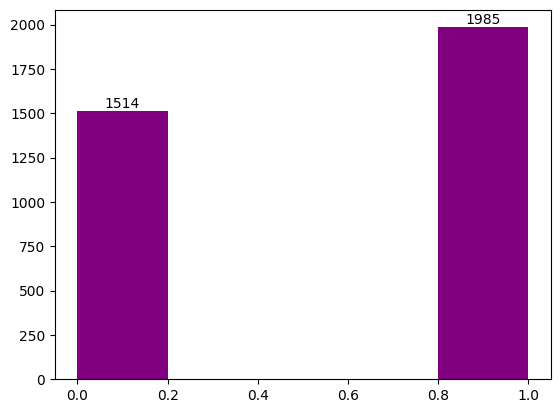

In [51]:
tmp = np.array(test_ensemble.user_suggestion.value_counts())
plt.text(0.1, tmp[1] + 20, tmp[1], ha='center')
plt.text(0.9, tmp[0] + 20, tmp[0], ha='center')
# print(test_ensemble.user_suggestion.value_counts())
plt.hist(test_ensemble.user_suggestion, 5, color='purple')

As previously: first bar contains number of negative ratings in test dataset and second - positive ratings.

(array([1601.,    0.,    0.,    0., 1898.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <BarContainer object of 5 artists>)

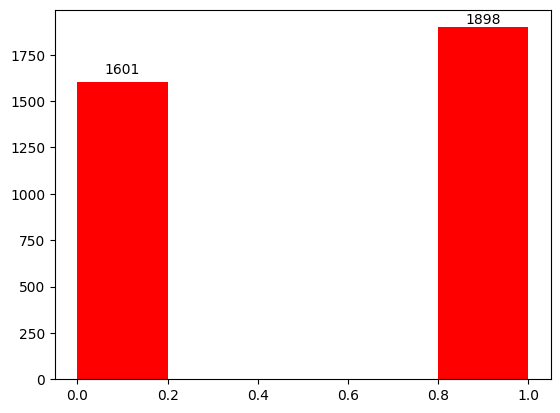

In [138]:
zeros = np.count_nonzero(pred_final == 0)
ones = np.count_nonzero(pred_final == 1)
plt.text(0.1, 1650, zeros, ha='center')
plt.text(0.9, 1920, ones, ha='center')
plt.hist(pred_final, 5, color='red')

And there we have predicted values. As we can expect there is small divergence due to good combined model accuracy.